In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn

In [2]:

#import the dataset
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

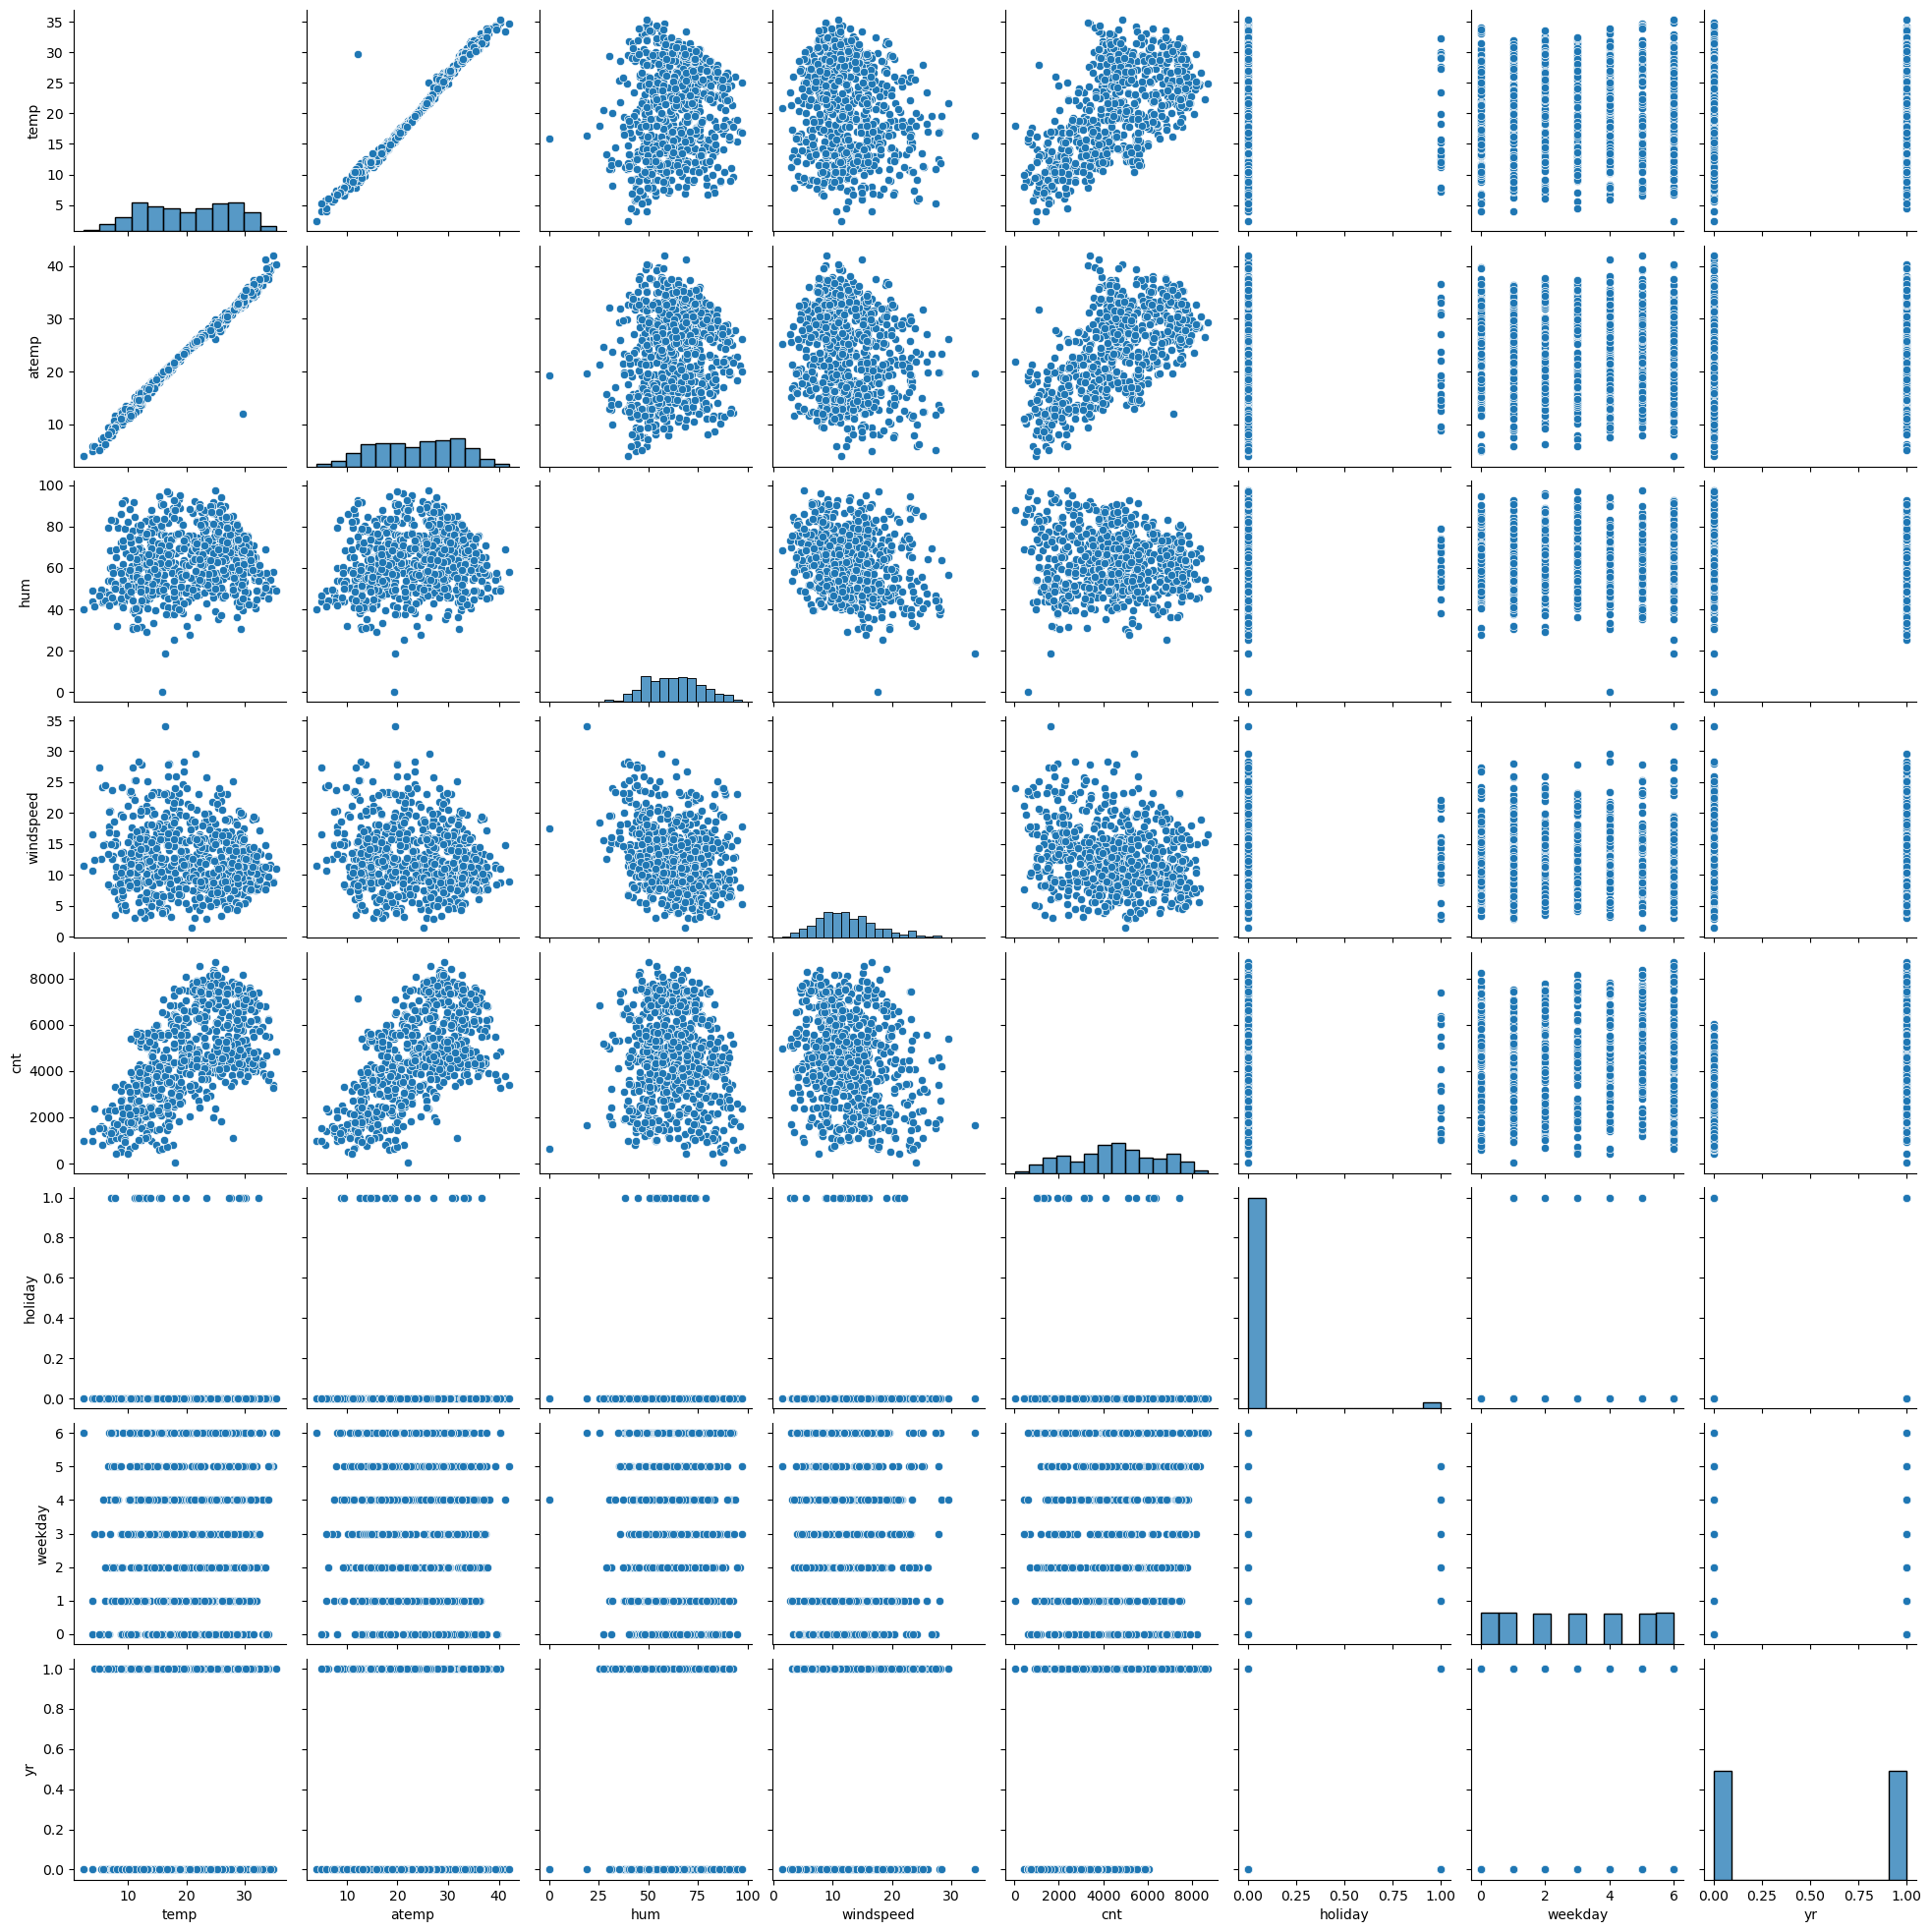

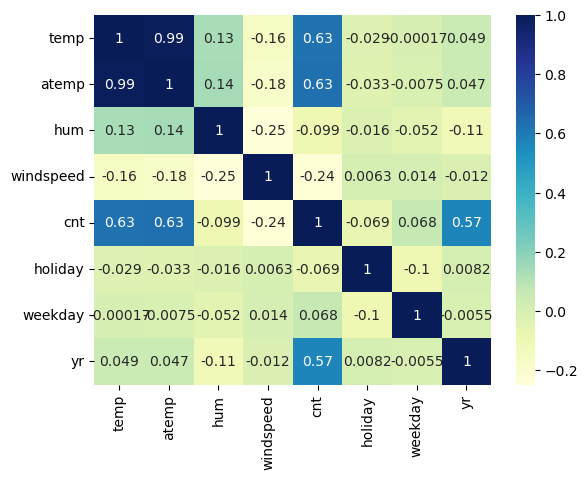

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

num_col = ['temp','atemp','hum','windspeed','cnt','holiday','weekday','yr']
sns.pairplot(df[num_col])
plt.show()


sns.heatmap(df[num_col].corr(), annot=True,cmap="YlGnBu")
plt.show()

#columns 'temp' & 'atemp' is showing strong correlation

In [5]:
#convert month digit to month name
import calendar
def deriveMonth(x):
    return calendar.month_name[x]

#df['mnth'] = df.mnth.apply(deriveMonth)
df.head()

#convert weathersit digit to weather name
df['weathersit'] = df['weathersit'].astype(str)

def weathertyp(x):
    x = int(x)
    if x==1: 
        return 'clear'
    elif x==2:
        return 'mist'
    elif x==3:
        return 'snow'
    else:
        return 'heavyRain'
    
df['weathersit']=df['weathersit'].apply(weathertyp)
    
def seasontyp(x):
    if x==1: 
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    


df['season']=df['season'].apply(seasontyp)

#convert date to day of the month as mnonth & year are available from other columns

df['dteday'] =df['dteday'].apply(lambda x:int(x[0:2]))
#df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])

df['weathersit'].value_counts()


clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

In [6]:
print(df.head())

   instant  dteday  season  yr  mnth  holiday  weekday  workingday weathersit  \
0        1       1  spring   0     1        0        6           0       mist   
1        2       2  spring   0     1        0        0           0       mist   
2        3       3  spring   0     1        0        1           1      clear   
3        4       4  spring   0     1        0        2           1      clear   
4        5       5  spring   0     1        0        3           1      clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600  


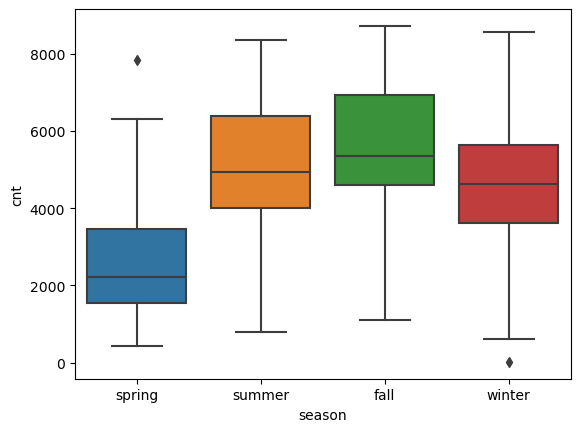

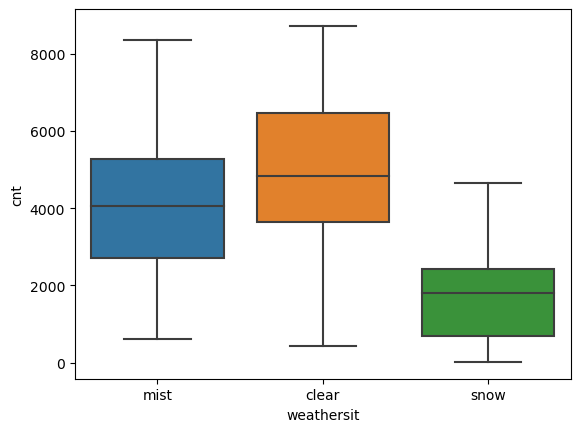

In [7]:
cat_col = ['season','weathersit']
for col in cat_col:
    sns.boxplot(x=col,y='cnt',data = df)
    plt.show()


In [8]:
#catcol = ['season','mnth','weekday','weathersit']
catcol = ['season','weathersit']

df_cat = pd.get_dummies(df[catcol],drop_first=True)
df = pd.concat([df,df_cat],axis=1)

#df_cat = pd.get_dummies(df['weathersit'],drop_first=True)
#df = pd.concat([df,df_cat],axis=1)

df['weathersit'].value_counts()

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

In [9]:

df = df.drop(catcol,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          730 non-null    int64  
 1   dteday           730 non-null    int64  
 2   yr               730 non-null    int64  
 3   mnth             730 non-null    int64  
 4   holiday          730 non-null    int64  
 5   weekday          730 non-null    int64  
 6   workingday       730 non-null    int64  
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  casual           730 non-null    int64  
 12  registered       730 non-null    int64  
 13  cnt              730 non-null    int64  
 14  season_spring    730 non-null    uint8  
 15  season_summer    730 non-null    uint8  
 16  season_winter    730 non-null    uint8  
 17  weathersit_mist 

In [10]:
df[['temp','atemp','hum','windspeed']] = round(df[['temp','atemp','hum','windspeed']],2)
df.head()
df.pop('dteday')

0       1
1       2
2       3
3       4
4       5
       ..
725    27
726    28
727    29
728    30
729    31
Name: dteday, Length: 730, dtype: int64

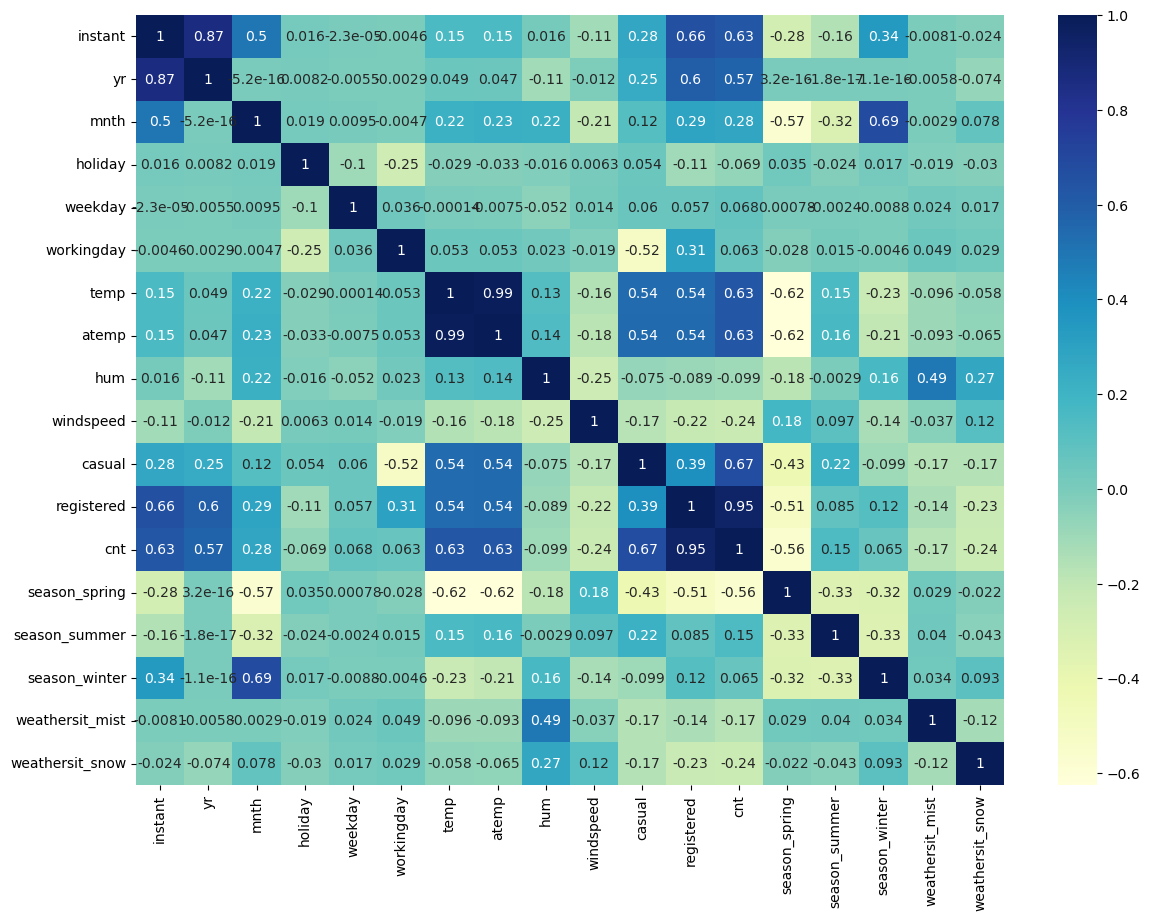

In [11]:
plt.figure(figsize=(14,10))

#uncommnet it later
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [12]:
df.head()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_mist,weathersit_snow
0,1,0,1,0,6,0,14.11,18.18,80.58,10.75,331,654,985,1,0,0,1,0
1,2,0,1,0,0,0,14.90,17.69,69.61,16.65,131,670,801,1,0,0,1,0
2,3,0,1,0,1,1,8.05,9.47,43.73,16.64,120,1229,1349,1,0,0,0,0
3,4,0,1,0,2,1,8.20,10.61,59.04,10.74,108,1454,1562,1,0,0,0,0
4,5,0,1,0,3,1,9.31,11.46,43.70,12.52,82,1518,1600,1,0,0,0,0


# Splitting train & test data

In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)



# Rescale the features

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

coltoRescale =['temp','atemp','hum','windspeed','mnth','weekday']
df_train[coltoRescale] = scalar.fit_transform(df_train[coltoRescale])
df_train[coltoRescale].describe()

,temp,atemp,hum,windspeed,mnth,weekday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537300,0.513098,0.650378,0.320866,0.504456,0.498366
std,0.225801,0.212393,0.145885,0.169770,0.315338,0.336182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339866,0.332174,0.538644,0.199230,0.181818,0.166667
50%,0.540565,0.527041,0.653751,0.296760,0.545455,0.500000
75%,0.735339,0.688632,0.754818,0.414501,0.818182,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#keep adding variable one by one
#Looking at pair plot 

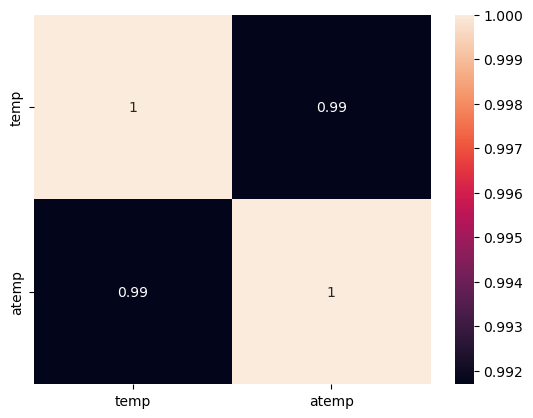

In [16]:
sns.heatmap(df[['temp','atemp']].corr(),annot=True)
plt.show()

# separate train & test set

In [17]:
y_train = df_train.pop("cnt")
X_train = df_train


In [18]:
#column 'cnt' is  sum of columns 'casual' + 'registered'. So, in effect we are trying to find how 'casual' & 'registered' count are increasing
#dropping 'casual' & 'registered' columns
remove_col=['casual','registered']
for col in remove_col:
    X_train.pop(col)

#Run Recursive Feature Elimination (RFE) to find relavant columns
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 2),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 2),
 ('weekday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('weathersit_mist', False, 2),
 ('weathersit_snow', True, 1)]

In [19]:

remove_col=['atemp']
for col in remove_col:
    X_train.pop(col)
X_train.describe()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          510 non-null    int64  
 1   yr               510 non-null    int64  
 2   mnth             510 non-null    float64
 3   holiday          510 non-null    int64  
 4   weekday          510 non-null    float64
 5   workingday       510 non-null    int64  
 6   temp             510 non-null    float64
 7   hum              510 non-null    float64
 8   windspeed        510 non-null    float64
 9   season_spring    510 non-null    uint8  
 10  season_summer    510 non-null    uint8  
 11  season_winter    510 non-null    uint8  
 12  weathersit_mist  510 non-null    uint8  
 13  weathersit_snow  510 non-null    uint8  
dtypes: float64(5), int64(4), uint8(5)
memory usage: 42.3 KB


In [20]:
#Building model using Ordinary least squares(OLS) method

lm.fit(X_train,y_train)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.57e-182
Time:                        17:45:16   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2142.0363    340.822      6.285      0.000    1472.401    2811.672
instant            -2.3879      4.045     -0.590      0.555     -10.336       5.560
yr               2889.5940   1479.468      1.953      0.051     -17.217    5796.405
mnth              905.7448   1366.945      0.663      0.508   -1779.984    3591.474
holiday          -560.0234    235.533     -2.378      0.018   -1022.792     -97.255
weekday           420.4341    108.104      3.889      0.000     208.035     632.833
workingday        165.0382     79.036      2.088      0.037       9.751     320.325
temp             4273.1245    297.262     14.375      0.000    3689.073    4857.176
hum             -1075.4974    339.290     -3.170      0.002   -1742.124    -408.870
windspeed       -1562.6140    230.634     -6.775      0.000   -2015.756   -1109.472
season_spring    -607.6695    199.602     -3.044      0.002    -999.841    -215.498
season_summer     402.7979    134.263      3.000      0.003     139.002     666.594
season_winter     752.8823    159.563      4.718      0.000     439.378    1066.387
weathersit_mist  -512.2949     95.151     -5.384      0.000    -699.245    -325.344
weathersit_snow -2164.7244    236.741     -9.144      0.000   -2629.866   -1699.583
==============================================================================
Omnibus:                       70.540   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.046
Skew:                          -0.701   Prob(JB):                     8.01e-40
Kurtosis:                       5.551   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#instant column havnig highest P value 0.555 & dropping it
X_train = X_train.drop('instant',axis=1)
lm.fit(X_train,y_train)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.32e-183
Time:                        17:45:16   Log-Likelihood:                -4129.9
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2107.6752    335.594      6.280      0.000    1448.315    2767.036
yr               2017.2898     72.758     27.726      0.000    1874.338    2160.242
mnth              109.7363    224.065      0.490      0.625    -330.498     549.971
holiday          -562.1287    235.351     -2.388      0.017   -1024.537     -99.720
weekday           419.6288    108.024      3.885      0.000     207.388     631.870
workingday        163.3302     78.931      2.069      0.039       8.250     318.410
temp             4282.8737    296.608     14.440      0.000    3700.111    4865.637
hum             -1089.4768    338.241     -3.221      0.001   -1754.038    -424.916
windspeed       -1567.8534    230.312     -6.808      0.000   -2020.360   -1115.347
season_spring    -600.7617    199.128     -3.017      0.003    -991.999    -209.524
season_summer     407.0045    133.986      3.038      0.003     143.755     670.254
season_winter     754.1540    159.444      4.730      0.000     440.886    1067.422
weathersit_mist  -506.7769     94.629     -5.355      0.000    -692.700    -320.854
weathersit_snow -2160.4144    236.473     -9.136      0.000   -2625.027   -1695.802
==============================================================================
Omnibus:                       72.442   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.237
Skew:                          -0.719   Prob(JB):                     5.98e-41
Kurtosis:                       5.579   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#casual & Registered are way a
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.18
5,temp,16.85
1,mnth,12.53
7,windspeed,4.80
10,season_winter,4.51
8,season_spring,4.42
4,workingday,3.20
3,weekday,3.16
9,season_summer,2.62
11,weathersit_mist,2.32


In [23]:
X_train = X_train.drop('hum',axis=1)
lm.fit(X_train,y_train)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.51e-182
Time:                        17:45:16   Log-Likelihood:                -4135.2
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1575.4079    294.831     

,Features,VIF
1,mnth,11.37
5,temp,9.26
6,windspeed,4.69
9,season_winter,3.95
4,workingday,3.17
3,weekday,3.16
7,season_spring,2.37
0,yr,2.07
8,season_summer,1.99
10,weathersit_mist,1.55


In [24]:
#mnth column havnig highest P value 0.857 & dropping it

In [25]:
X_train = X_train.drop('mnth',axis=1)
lm.fit(X_train,y_train)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

#check VIF(variance inflation factor, ideally it has to be less than 5)

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.01e-183
Time:                        17:45:16   Log-Likelihood:                -4135.2
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     498   BIC:                             8345.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1597.6339    267.460     

,Features,VIF
4,temp,5.27
5,windspeed,4.63
3,workingday,3.15
2,weekday,3.10
6,season_spring,2.28
0,yr,2.07
7,season_summer,1.85
8,season_winter,1.75
9,weathersit_mist,1.54
1,holiday,1.10


In [26]:
y_train_price = lm.predict(X_train)

Text(0.5, 0, 'Errors')

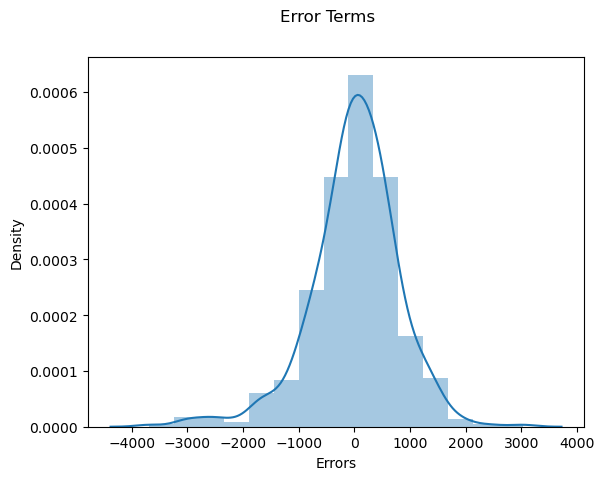

In [27]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 15)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')    

#Error terms mean is at 0, symmetric & well distributed. 

In [28]:
print(X_train.columns)

coltoRescale =['temp','atemp','hum','windspeed','mnth','weekday']

df_test[coltoRescale] = scalar.transform(df_test[coltoRescale])
print(X_train.columns)


Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')
Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')


In [29]:
y_test = df_test.pop('cnt')


In [30]:
X_test_sm = sm.add_constant(df_test)
X_test_sm =X_test_sm.drop(['casual','registered','atemp','instant','hum','mnth'],axis=1)
print(X_test_sm.columns)

Index(['const', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weathersit_mist',
       'weathersit_snow'],
      dtype='object')


In [31]:
y_test_mod = model.predict(X_test_sm)

Text(0, 0.5, 'y_test_mod')

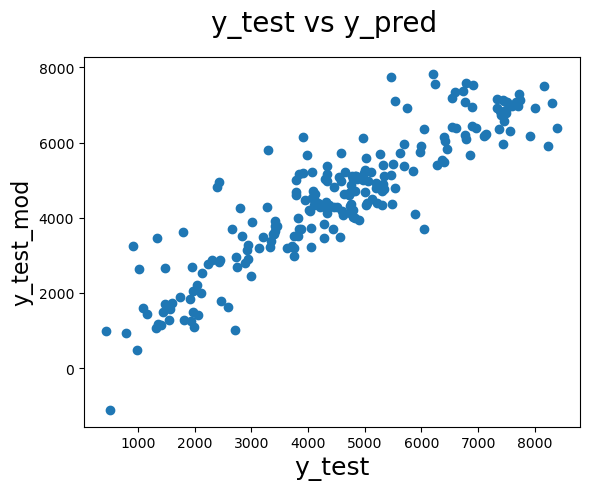

In [32]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_mod)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_mod', fontsize = 16)  

In [33]:
print(sklearn.metrics.r2_score(y_true=y_train,y_pred=y_train_price))

0.8301613608489926


In [34]:
print(sklearn.metrics.r2_score(y_true=y_test,y_pred=y_test_mod))

0.8050038578607921


In [35]:
# test & train data R-square results are looking matching.

In [37]:
#Final linear regression value for 'cnt' is calucated by
#cnt = 2042.3001 * yr - 558.2136 * holiday + 453.0907 * weekday + 165.8493 * workingday + 4062.3312 * temp - 1349.8031 * windspeed -704.0530 * season_spring + 339.6884 * season_summer + 692.4227 * season_winter -685.5051 * weathersit_mist -2466.5586 * weathersit_snow + 1597.6339 

In [ ]:
#Following variables are affecting Bike sales count 'cnt' & co-efficients of each of them are below

#   varibles      co-efficients
#-----------------------------
#yr               2042.3001     
#holiday          -558.2136    
#weekday           456.0907    
#workingday        165.8493     
#temp             4062.3312   
#windspeed       -1349.8031   
#season_spring    -704.0530    
#season_summer     339.6884    
#season_winter     692.4227    
#weathersit_mist  -685.5051     
#weathersit_snow -2466.5586

#From above independent variables its clear that,
#temp, weathsit_snow, yr are most signficant. Increase in weather and yr (2019) are positively affecting bike sales, 
#whereas snow weather is negatively affecting the sales.

